# **Tugas 4 : Centrality**

# Ke 1 : Hubungan antar 2 berita

In [ ]:
from google.colab import files

# Upload file  dari komputer
uploaded_preprosessing = files.upload()

Saving Data 2 dokumen dengan perbedaan kelas.csv to Data 2 dokumen dengan perbedaan kelas.csv


In [ ]:
import pandas as pd
import io

# Membaca file CSV yang diunggah dan menyimpannya ke dalam DataFrame dengan variabel df_trans
df = pd.read_csv(io.BytesIO(uploaded_preprosessing['Data 2 dokumen dengan perbedaan kelas.csv']))
df

,judul,tanggal,isi,kategori,cleaned_text,norm_text,token_text,swremove_text,clean_text,kategori_encoded
0,Badan Kurus Tak Berarti Bebas dari Kolesterol ...,"Kamis, 05 Sep 2024 11:03 WIB",Jakarta - Tak sedikit yang beranggapan bahwa o...,Kesehatan,Jakarta Tak sedikit yang beranggapan bahwa ora...,jakarta tidak sedikit yang beranggapan bahwa o...,"['jakarta', 'tidak', 'sedikit', 'yang', 'beran...","['jakarta', 'sedikit', 'beranggapan', 'orang',...",jakarta sedikit beranggapan orang berbadan kur...,0
1,Paus Fransiskus Tak Mau Bermewah-mewah di Jaka...,"Kamis, 05 Sep 2024 09:40 WIB",Jakarta - Pemimpin Tertinggi Gereja Katolik Se...,Pariwisata,Jakarta Pemimpin Tertinggi Gereja Katolik Sedu...,jakarta pemimpin tertinggi gereja katolik sedu...,"['jakarta', 'pemimpin', 'tertinggi', 'gereja',...","['jakarta', 'pemimpin', 'tertinggi', 'gereja',...",jakarta pemimpin tertinggi gereja katolik sedu...,1


In [ ]:
# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)

10 Fitur Terbaik:
         Feature     Score
203  kolesterol  0.516764
295        paus  0.463128
431        yang  0.386871
96           di  0.354031
69         bisa  0.344509
86          dan  0.295992
120  fransiskus  0.292502
146   indonesia  0.268127
406      tinggi  0.262464
168        juga  0.251131


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
             kolesterol      paus      yang        di      bisa       dan  \
kolesterol    1.000000  0.000000  0.716768  0.074183  1.000000  0.577119   
paus          0.000000  1.000000  0.697312  0.997245  0.000000  0.816660   
yang          0.716768  0.697312  1.000000  0.748563  0.716768  0.983127   
di            0.074183  0.997245  0.748563  1.000000  0.074183  0.857222   
bisa          1.000000  0.000000  0.716768  0.074183  1.000000  0.577119   
dan           0.577119  0.816660  0.983127  0.857222  0.577119  1.000000   
fransiskus    0.000000  1.000000  0.697312  0.997245  0.000000  0.816660   
indonesia     0.000000  1.000000  0.697312  0.997245  0.000000  0.816660   
tinggi        0.997506  0.070577  0.764194  0.144380  0.997506  0.633317   
juga          0.816333  0.577582  0.987876  0.636548  0.816333  0.942809   

            fransiskus  indonesia    tinggi      juga  
kolesterol    0.000000   0.000000  0.997506  0.816333  
paus          1.000000  

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)


Classification Matrix:
             kolesterol  paus  yang  di  bisa  dan  fransiskus  indonesia  \
kolesterol           1     0     1   0     1    1           0          0   
paus                 0     1     1   1     0    1           1          1   
yang                 1     1     1   1     1    1           1          1   
di                   0     1     1   1     0    1           1          1   
bisa                 1     0     1   0     1    1           0          0   
dan                  1     1     1   1     1    1           1          1   
fransiskus           0     1     1   1     0    1           1          1   
indonesia            0     1     1   1     0    1           1          1   
tinggi               1     0     1   0     1    1           0          0   
juga                 1     1     1   1     1    1           1          1   

            tinggi  juga  
kolesterol       1     1  
paus             0     1  
yang             1     1  
di               0     1  
bis

In [ ]:
import pandas as pd
import networkx as nx

# Asumsikan 'classification' adalah DataFrame yang sudah ada
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Mengubah hasil menjadi DataFrame untuk ditampilkan secara vertikal
degree_df = pd.DataFrame(list(degree.items()), columns=['Node', 'Degree'])
closeness_df = pd.DataFrame(list(closeness.items()), columns=['Node', 'Closeness Centrality'])
betweenness_df = pd.DataFrame(list(betweenness.items()), columns=['Node', 'Betweenness Centrality'])

# Menampilkan hasil
print("\nDegree:\n", degree_df)
print("\nCloseness Centrality:\n", closeness_df)
print("\nBetweenness Centrality:\n", betweenness_df)



Degree:
          Node  Degree
0  kolesterol       7
1        paus       8
2        yang      11
3          di       8
4        bisa       7
5         dan      11
6  fransiskus       8
7   indonesia       8
8      tinggi       7
9        juga      11

Closeness Centrality:
          Node  Closeness Centrality
0  kolesterol              0.692308
1        paus              0.750000
2        yang              1.000000
3          di              0.750000
4        bisa              0.692308
5         dan              1.000000
6  fransiskus              0.750000
7   indonesia              0.750000
8      tinggi              0.692308
9        juga              1.000000

Betweenness Centrality:
          Node  Betweenness Centrality
0  kolesterol                0.000000
1        paus                0.000000
2        yang                0.111111
3          di                0.000000
4        bisa                0.000000
5         dan                0.111111
6  fransiskus                0.00000

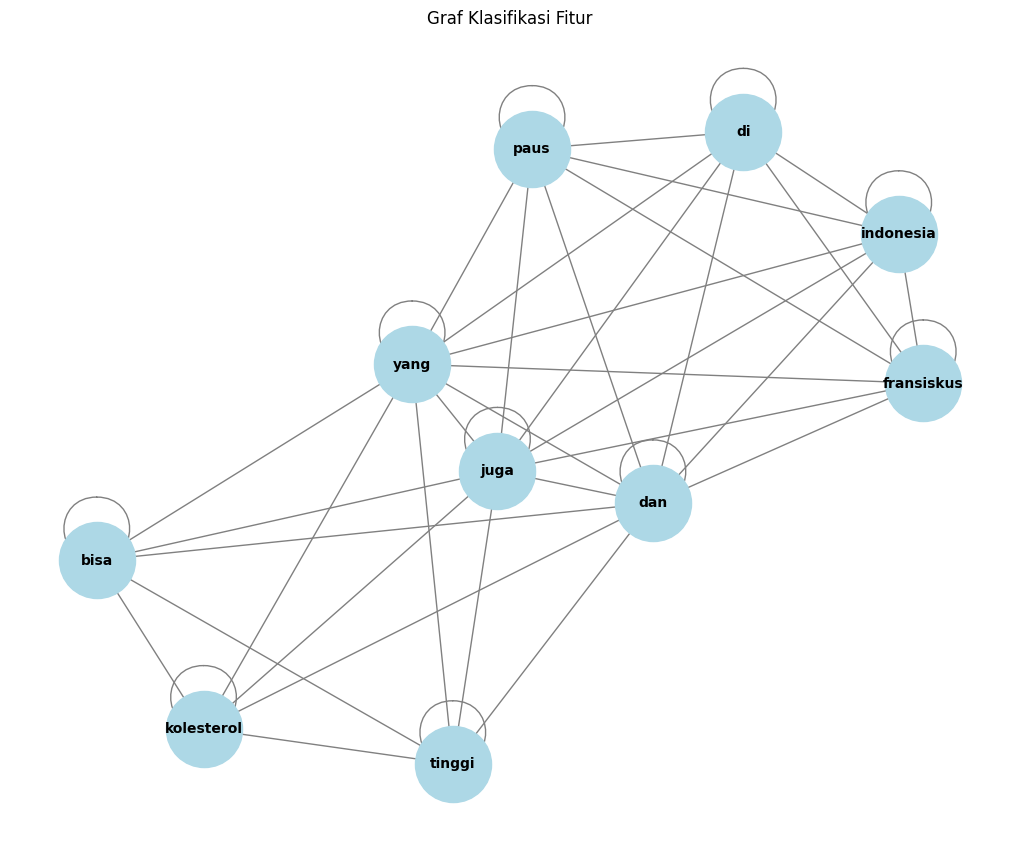

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()

# Ke 2 : 1 berita menjadi beberapa kalimat berdasarkan tanda titik

In [ ]:
from google.colab import files

# Upload file  dari komputer
uploaded_preprosessing = files.upload()

Saving data 1 berita.csv to data 1 berita (1).csv


In [ ]:
import pandas as pd
import io

# Membaca file CSV yang diunggah dan menyimpannya ke dalam DataFrame dengan variabel df_trans
df = pd.read_csv(io.BytesIO(uploaded_preprosessing['data 1 berita (1).csv']))
df.head(5) # Menampilkan 5 baris pertama dari DataFrame

,judul,tanggal,isi,kategori,cleaned_text,norm_text,token_text,swremove_text,clean_text
0,Badan Kurus Tak Berarti Bebas dari Kolesterol ...,"Kamis, 05 Sep 2024 11:03 WIB",Jakarta - Tak sedikit yang beranggapan bahwa o...,Kesehatan,Jakarta Tak sedikit yang beranggapan bahwa ora...,jakarta tidak sedikit yang beranggapan bahwa o...,"['jakarta', 'tidak', 'sedikit', 'yang', 'beran...","['jakarta', 'sedikit', 'beranggapan', 'orang',...",jakarta sedikit beranggapan orang berbadan kur...


In [ ]:
# Membuat list untuk menyimpan hasil
result_list = []

# Looping untuk memisahkan kalimat dari setiap berita
for index, row in df.iterrows():
    sentences = row['isi'].split('.')  # Pisahkan kalimat berdasarkan titik
    sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong
    for i, sentence in enumerate(sentences, 1):
        result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df

,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Tak sedikit yang beranggapan bahwa o...
1,Kalimat ke 2,Sebenarnya apakah anggapan hal tersebut benar ...
2,Kalimat ke 3,Ia mengatakan sebenarnya ada banyak faktor yan...
3,Kalimat ke 4,Selain pola makan buruk dan kurangnya olahraga...
4,Kalimat ke 5,ADVERTISEMENT\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
5,Kalimat ke 6,Sedangkan pada orang yang memiliki badan gemuk...
6,Kalimat ke 7,"Tidak hanya hipertensi, masalah obesitas juga ..."
7,Kalimat ke 8,Baca juga: Sederet Gejala Kolesterol Tinggi ya...
8,Kalimat ke 9,"""Ketika seseorang mengalami obese, itu bisa me..."
9,Kalimat ke 10,dr Aru kembali mengingatkan bahwa kolesterol t...


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords

#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk

from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,kalimat ke n,final
0,Kalimat ke 1,jakarta anggap orang badan kurus bebas risiko ...
1,Kalimat ke 2,anggap adanyaspesialis sakit dr aru ariadno sp...
2,Kalimat ke 3,faktor kadar kolesterol tubuh
3,Kalimat ke 4,pola makan buruk kurang olahraga faktor utama ...
4,Kalimat ke 5,advertisement scroll to continue with content ...
5,Kalimat ke 6,orang milik badan gemuk obesitas rentan kolest...
6,Kalimat ke 7,hipertensi obesitas dampak sehat manusia tangan
7,Kalimat ke 8,baca deret gejala kolesterol muncul priaselain...
8,Kalimat ke 9,alami obese sebab sindrom metabolik diabetes k...
9,Kalimat ke 10,dr aru kolesterol akibat pola makan buruk jara...


In [ ]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,adanyaspesialis,advertisement,akibat,aktivitas,alami,anggap,ariadno,aru,avksuc,...,tanda,tangan,timbul,tinggi,tingkat,to,tubuh,turut,utama,with
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.276644,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.360743,0.000000,0.000000,0.000000,0.000000,0.312227,0.360743,0.277805,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kalimat ke 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.557303,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292877,0.000000
4,Kalimat ke 5,0.000000,0.240342,0.000000,0.000000,0.208019,0.000000,0.000000,0.185086,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.240342,0.000000,0.000000,0.000000,0.240342
5,Kalimat ke 6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.443187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.233207,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.233207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.000000,0.348696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.000000,0.000000,0.410773,0.000000,0.000000,0.000000,0.000000,0.316333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,Kalimat ke 11,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14
kalimat ke n,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.086376,0.067749,0.035604,0.162241,0.423803,0.000000,0.165141,0.042390,0.043220,0.551109,0.039107,0.035242,0.116029
Kalimat ke 2,0.086376,1.000000,0.000000,0.000000,0.102836,0.000000,0.000000,0.000000,0.000000,0.175758,0.000000,0.000000,0.000000,0.050284
Kalimat ke 3,0.067749,0.000000,1.000000,0.362304,0.050943,0.052059,0.000000,0.049431,0.042697,0.043534,0.000000,0.397956,0.035497,0.039441
Kalimat ke 4,0.035604,0.000000,0.362304,1.000000,0.087696,0.027358,0.000000,0.170127,0.022438,0.380912,0.114306,0.175858,0.018655,0.020727
Kalimat ke 5,0.162241,0.102836,0.050943,0.087696,1.000000,0.096066,0.000000,0.036901,0.104410,0.149597,0.157536,0.029406,0.026500,0.051112
Kalimat ke 6,0.423803,0.000000,0.052059,0.027358,0.096066,1.000000,0.163081,0.083989,0.032573,0.033211,0.601427,0.030050,0.027080,0.067014
Kalimat ke 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.163081,1.000000,0.000000,0.133754,0.000000,0.000000,0.097689,0.000000,0.048906
Kalimat ke 8,0.165141,0.000000,0.049431,0.170127,0.036901,0.083989,0.000000,1.000000,0.030928,0.134760,0.042484,0.070532,0.025713,0.078607
Kalimat ke 9,0.042390,0.000000,0.042697,0.022438,0.104410,0.032573,0.133754,0.030928,1.000000,0.027238,0.000000,0.024646,0.022210,0.136992


In [ ]:
# Tetapkan ambang batas (threshold) 0.7
threshold = 0.5

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,Kalimat ke 11,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14
kalimat ke n,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
Kalimat ke 2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,0,0,0,1,0,0,0
Kalimat ke 7,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,0,0,0,0


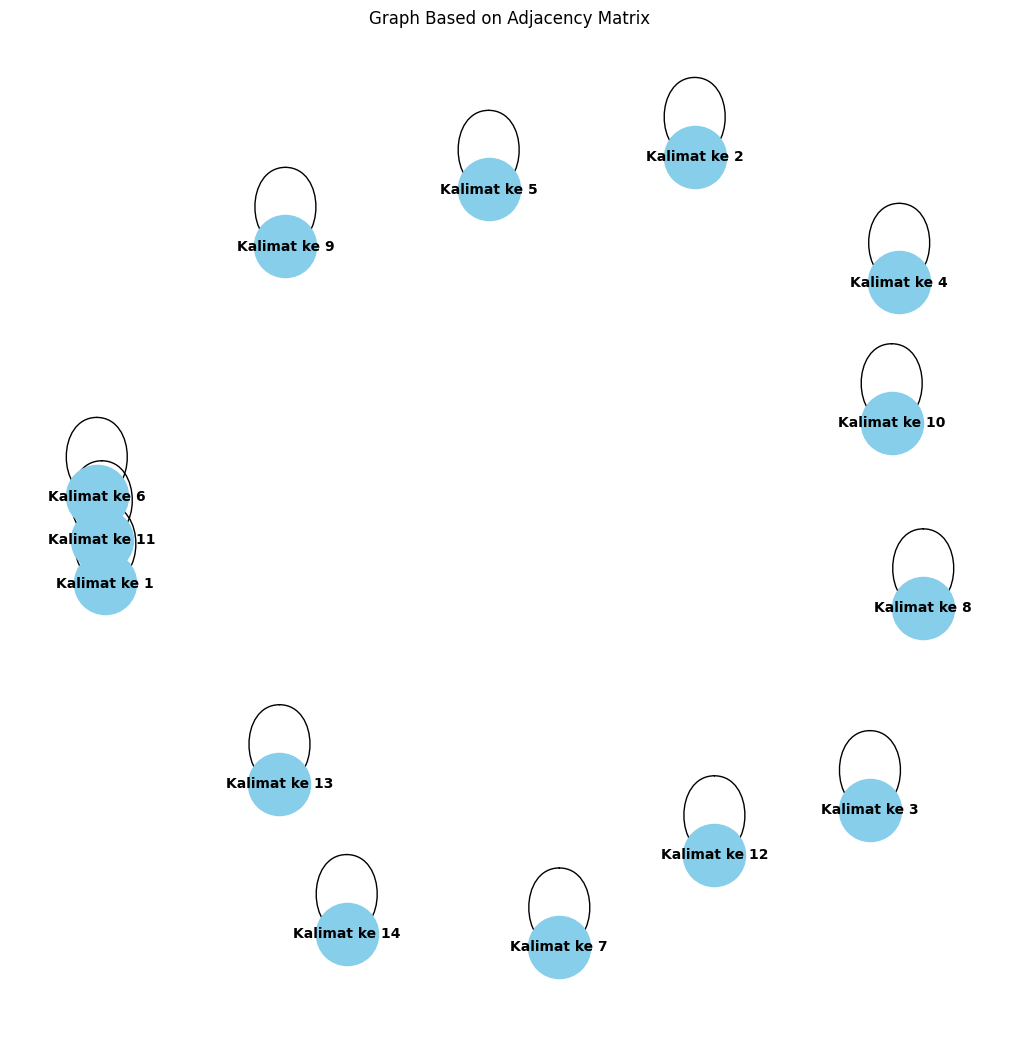

In [ ]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix")
plt.show()

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.000000,0.230769,0.102564
1,Kalimat ke 2,0.000000,0.153846,0.000000
2,Kalimat ke 3,0.000000,0.153846,0.000000
3,Kalimat ke 4,0.000000,0.153846,0.000000
4,Kalimat ke 5,0.000000,0.153846,0.000000
5,Kalimat ke 6,0.000000,0.230769,0.102564
6,Kalimat ke 7,0.000000,0.153846,0.000000
7,Kalimat ke 8,0.000000,0.153846,0.000000
8,Kalimat ke 9,0.000000,0.153846,0.000000
9,Kalimat ke 10,0.000000,0.153846,0.000000


# Ke 3 : Fitur extraction dari semua dokumen

In [ ]:
from google.colab import files

# Upload file  dari komputer
uploaded_preprosessing = files.upload()

Saving data_preprosessing.csv to data_preprosessing.csv


In [ ]:
import pandas as pd
import io

# Membaca file CSV yang diunggah dan menyimpannya ke dalam DataFrame dengan variabel df_trans
df = pd.read_csv(io.BytesIO(uploaded_preprosessing['data_preprosessing.csv']))
df.head(5) # Menampilkan 5 baris pertama dari DataFrame

,judul,tanggal,isi,kategori,cleaned_text,norm_text,token_text,swremove_text
0,Badan Kurus Tak Berarti Bebas dari Kolesterol ...,"Kamis, 05 Sep 2024 11:03 WIB",Jakarta - Tak sedikit yang beranggapan bahwa o...,Kesehatan,Jakarta Tak sedikit yang beranggapan bahwa ora...,jakarta tidak sedikit yang beranggapan bahwa o...,"['jakarta', 'tidak', 'sedikit', 'yang', 'beran...","['jakarta', 'sedikit', 'beranggapan', 'orang',..."
1,Budaya Kerja Toksik di Jepang Picu 54 Karyawan...,"Kamis, 05 Sep 2024 10:38 WIB",Jakarta -\n \n Istilah 'bekerja ...,Kesehatan,Jakarta Istilah bekerja sampai mati nampaknya ...,jakarta istilah bekerja sampai mati nampaknya ...,"['jakarta', 'istilah', 'bekerja', 'sampai', 'm...","['jakarta', 'istilah', 'bekerja', 'mati', 'nam..."
2,Menyoal Serangan Jantung yang Dialami Faisal B...,"Kamis, 05 Sep 2024 10:03 WIB",Jakarta - Faisal Basri meninggal dunia. Ekonom...,Kesehatan,Jakarta Faisal Basri meninggal dunia Ekonom Un...,jakarta faisal basri meninggal dunia ekonom un...,"['jakarta', 'faisal', 'basri', 'meninggal', 'd...","['jakarta', 'faisal', 'basri', 'meninggal', 'd..."
3,Nyeri Kronis yang Bikin Paus Fransiskus Tak Bi...,"Kamis, 05 Sep 2024 09:37 WIB",Jakarta - Pemimpin tertinggi Gereja Katolik se...,Kesehatan,Jakarta Pemimpin tertinggi Gereja Katolik sedu...,jakarta pemimpin tertinggi gereja katolik sedu...,"['jakarta', 'pemimpin', 'tertinggi', 'gereja',...","['jakarta', 'pemimpin', 'tertinggi', 'gereja',..."
4,"Perundungan PPDS Tak Cuma Terjadi di Undip, Be...","Kamis, 05 Sep 2024 08:35 WIB",Jakarta - Aksi bullying atau perundungan di ma...,Kesehatan,Jakarta Aksi bullying atau perundungan di masa...,jakarta aksi bullying atau perundungan di masa...,"['jakarta', 'aksi', 'bullying', 'atau', 'perun...","['jakarta', 'aksi', 'bullying', 'perundungan',..."


In [ ]:
import ast

df_doc = df.copy()
# Mengonversi string menjadi list jika perlu
df_doc['swremove_text'] = df_doc['swremove_text'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Membuat kolom baru 'clean_text' dengan menggabungkan list dalam 'swremove_text' menjadi kalimat biasa
df_doc['clean_text'] = df_doc['swremove_text'].apply(lambda x: ' '.join([str(word) for word in x]))

df_doc

,judul,tanggal,isi,kategori,cleaned_text,norm_text,token_text,swremove_text,clean_text
0,Badan Kurus Tak Berarti Bebas dari Kolesterol ...,"Kamis, 05 Sep 2024 11:03 WIB",Jakarta - Tak sedikit yang beranggapan bahwa o...,Kesehatan,Jakarta Tak sedikit yang beranggapan bahwa ora...,jakarta tidak sedikit yang beranggapan bahwa o...,"['jakarta', 'tidak', 'sedikit', 'yang', 'beran...","[jakarta, sedikit, beranggapan, orang, berbada...",jakarta sedikit beranggapan orang berbadan kur...
1,Budaya Kerja Toksik di Jepang Picu 54 Karyawan...,"Kamis, 05 Sep 2024 10:38 WIB",Jakarta -\n \n Istilah 'bekerja ...,Kesehatan,Jakarta Istilah bekerja sampai mati nampaknya ...,jakarta istilah bekerja sampai mati nampaknya ...,"['jakarta', 'istilah', 'bekerja', 'sampai', 'm...","[jakarta, istilah, bekerja, mati, nampaknya, s...",jakarta istilah bekerja mati nampaknya ssudah ...
2,Menyoal Serangan Jantung yang Dialami Faisal B...,"Kamis, 05 Sep 2024 10:03 WIB",Jakarta - Faisal Basri meninggal dunia. Ekonom...,Kesehatan,Jakarta Faisal Basri meninggal dunia Ekonom Un...,jakarta faisal basri meninggal dunia ekonom un...,"['jakarta', 'faisal', 'basri', 'meninggal', 'd...","[jakarta, faisal, basri, meninggal, dunia, eko...",jakarta faisal basri meninggal dunia ekonom un...
3,Nyeri Kronis yang Bikin Paus Fransiskus Tak Bi...,"Kamis, 05 Sep 2024 09:37 WIB",Jakarta - Pemimpin tertinggi Gereja Katolik se...,Kesehatan,Jakarta Pemimpin tertinggi Gereja Katolik sedu...,jakarta pemimpin tertinggi gereja katolik sedu...,"['jakarta', 'pemimpin', 'tertinggi', 'gereja',...","[jakarta, pemimpin, tertinggi, gereja, katolik...",jakarta pemimpin tertinggi gereja katolik sedu...
4,"Perundungan PPDS Tak Cuma Terjadi di Undip, Be...","Kamis, 05 Sep 2024 08:35 WIB",Jakarta - Aksi bullying atau perundungan di ma...,Kesehatan,Jakarta Aksi bullying atau perundungan di masa...,jakarta aksi bullying atau perundungan di masa...,"['jakarta', 'aksi', 'bullying', 'atau', 'perun...","[jakarta, aksi, bullying, perundungan, masa, p...",jakarta aksi bullying perundungan masa program...
...,...,...,...,...,...,...,...,...,...
95,"Iwh, Pekerja Speedboat Thailand Pamer BAB ke L...","Rabu, 04 Sep 2024 05:01 WIB",Jakarta - Warga Thailand dibuat jijik dengan k...,Pariwisata,Jakarta Warga Thailand dibuat jijik dengan kel...,jakarta warga thailand dibuat jijik dengan kel...,"['jakarta', 'warga', 'thailand', 'dibuat', 'ji...","[jakarta, warga, thailand, dibuat, jijik, kela...",jakarta warga thailand dibuat jijik kelakuan s...
96,"Ogah Bayar Layanan, 3 Turis Palestina Keroyok ...","Selasa, 03 Sep 2024 21:05 WIB",Taba - Seorang staf hotel di Mesir tewas usai ...,Pariwisata,Taba Seorang staf hotel di Mesir tewas usai be...,taba seorang staf hotel di mesir tewas usai be...,"['taba', 'seorang', 'staf', 'hotel', 'di', 'me...","[taba, seorang, staf, hotel, mesir, tewas, usa...",taba seorang staf hotel mesir tewas usai berke...
97,"Licik, Keluarga Taruh Kecoa di Piring Agar Mak...","Selasa, 03 Sep 2024 20:37 WIB",Jakarta - Keluarga asal Meksiko dituduh melaku...,Pariwisata,Jakarta Keluarga asal Meksiko dituduh melakuka...,jakarta keluarga asal meksiko dituduh melakuka...,"['jakarta', 'keluarga', 'asal', 'meksiko', 'di...","[jakarta, keluarga, asal, meksiko, dituduh, me...",jakarta keluarga asal meksiko dituduh melakuka...
98,"Terulang Lagi, Triatlon Paralimpiade Ditunda g...","Selasa, 03 Sep 2024 20:05 WIB","Paris - Saat Olimpiade Paris 2024 lalu, kompet...",Pariwisata,Paris Saat Olimpiade Paris lalu kompetisi tria...,paris saat olimpiade paris lalu kompetisi tria...,"['paris', 'saat', 'olimpiade', 'paris', 'lalu'...","[paris, olimpiade, paris, lalu, kompetisi, tri...",paris olimpiade paris lalu kompetisi triatlon ...


In [ ]:
# Cek jumlah missing values di setiap kolom
missing_values = df_doc.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
judul            0
tanggal          0
isi              0
kategori         0
cleaned_text     0
norm_text        0
token_text       0
swremove_text    0
clean_text       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df_doc.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df_doc['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df_doc)



Nilai sebelum dan sesudah konversi:
{'Kesehatan': 0, 'Pariwisata': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0   Badan Kurus Tak Berarti Bebas dari Kolesterol ...   
1   Budaya Kerja Toksik di Jepang Picu 54 Karyawan...   
2   Menyoal Serangan Jantung yang Dialami Faisal B...   
3   Nyeri Kronis yang Bikin Paus Fransiskus Tak Bi...   
4   Perundungan PPDS Tak Cuma Terjadi di Undip, Be...   
..                                                ...   
95  Iwh, Pekerja Speedboat Thailand Pamer BAB ke L...   
96  Ogah Bayar Layanan, 3 Turis Palestina Keroyok ...   
97  Licik, Keluarga Taruh Kecoa di Piring Agar Mak...   
98  Terulang Lagi, Triatlon Paralimpiade Ditunda g...   
99  Wow, Super Air Jet Buka 8 Rute Baru dari Semar...   

                          tanggal  \
0    Kamis, 05 Sep 2024 11:03 WIB   
1    Kamis, 05 Sep 2024 10:38 WIB   
2    Kamis, 05 Sep 2024 10:03 WIB   
3    Kamis, 05 Sep 2024 09:37 WIB   
4    Kamis, 05 Sep 2024 

In [ ]:
# Menyimpan DataFrame ke file CSV
df_doc.to_csv('teks beneran bersih rill cuy.csv', index=False)

In [ ]:
# Menggunakan kolom 'clean_text' untuk TF-IDF
texts = df_doc['clean_text'].fillna('')

# **TF-IDF Weighting**

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(texts)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Simpan hasil TF-IDF ke CSV
output_file = 'tfidf_result.csv'
tfidf_df.to_csv(output_file, index=False)

tfidf_df.head(100)

,aachen,abad,abang,abc,abdalmasih,abidin,abinader,abror,absen,abuabu,...,zaitunalpukatselain,zaman,zat,zealand,zef,zenix,zero,zoonosis,zulies,zurich
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.034334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.071978,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.049785,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.000000,0.055477,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.050274,0.037478,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aachen,abad,abang,abc,abdalmasih,abidin,abinader,abror,absen,abuabu,...,zaitunalpukatselain,zaman,zat,zealand,zef,zenix,zero,zoonosis,zulies,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

            Node  Degree Centrality
4261   pelanggan            0.00016
3780          mi            0.00016
932     citilink            0.00016
2111      instan            0.00016
0         aachen            0.00000
...          ...                ...
2077     infonya            0.00000
2076        info            0.00000
2075     infeksi            0.00000
2074  infectious            0.00000
6238      zurich            0.00000

[6239 rows x 2 columns]


In [ ]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf_binary = df_train_tfidf_binary.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf_binary)



Top 10 fitur berdasarkan degree centrality:
['pelanggan', 'mi', 'citilink', 'instan', 'aachen', 'panasmemang', 'pangdam', 'pangan', 'pandjaitan', 'pandemikamal']

DataFrame asli dengan semua fitur (tanpa menghapus):
    aachen  abad  abang  abc  abdalmasih  abidin  abinader  abror  absen  \
0        0     0      0    0           0       0         0      0      0   
1        0     0      0    0           0       0         0      0      0   
2        0     0      0    0           0       0         0      0      0   
3        0     0      0    0           0       0         0      0      0   
4        0     0      0    0           0       0         0      0      0   
..     ...   ...    ...  ...         ...     ...       ...    ...    ...   
95       0     0      0    0           0       0         0      0      0   
96       0     0      0    0           0       0         0      0      0   
97       0     0      0    0           0       0         0      0      0   
98       0     0      0

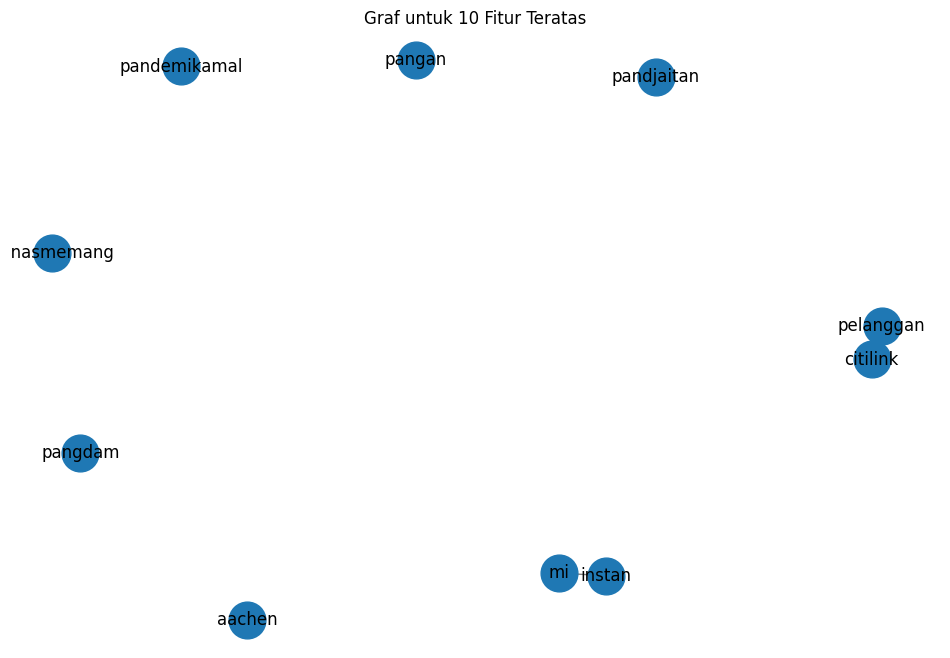

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

           Node  Degree Centrality  Closeness Centrality  \
0     pelanggan            0.00016              0.111111   
1            mi            0.00016              0.111111   
2      citilink            0.00016              0.111111   
3        instan            0.00016              0.111111   
4        aachen            0.00000              0.000000   
5   panasmemang            0.00000              0.000000   
6       pangdam            0.00000              0.000000   
7        pangan            0.00000              0.000000   
8    pandjaitan            0.00000              0.000000   
9  pandemikamal            0.00000              0.000000   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
              pelanggan   mi  citilink  instan  aachen  panasmemang  pangdam  \
pelanggan           1.0  0.0       1.0     0.0     0.0          0.0      0.0   
mi                  0.0  1.0       0.0     1.0     0.0          0.0      0.0   
citilink            1.0  0.0       1.0     0.0     0.0          0.0      0.0   
instan              0.0  1.0       0.0     1.0     0.0          0.0      0.0   
aachen              0.0  0.0       0.0     0.0     0.0          0.0      0.0   
panasmemang         0.0  0.0       0.0     0.0     0.0          0.0      0.0   
pangdam             0.0  0.0       0.0     0.0     0.0          0.0      0.0   
pangan              0.0  0.0       0.0     0.0     0.0          0.0      0.0   
pandjaitan          0.0  0.0       0.0     0.0     0.0          0.0      0.0   
pandemikamal        0.0  0.0       0.0     0.0     0.0          0.0      0.0   

              pangan  pandjaitan  pandemikamal  
pelanggan        0.0         0

# Ke 4 : Fitur extraction dari 1 dokumen

In [ ]:
from google.colab import files

# Upload file  dari komputer
uploaded_preprosessing = files.upload()

Saving data 1 berita.csv to data 1 berita.csv


In [ ]:
import pandas as pd
import io

# Membaca file CSV yang diunggah dan menyimpannya ke dalam DataFrame dengan variabel df_trans
df = pd.read_csv(io.BytesIO(uploaded_preprosessing['data 1 berita.csv']))
df.head()

,judul,tanggal,isi,kategori,cleaned_text,norm_text,token_text,swremove_text,clean_text
0,Badan Kurus Tak Berarti Bebas dari Kolesterol ...,"Kamis, 05 Sep 2024 11:03 WIB",Jakarta - Tak sedikit yang beranggapan bahwa o...,Kesehatan,Jakarta Tak sedikit yang beranggapan bahwa ora...,jakarta tidak sedikit yang beranggapan bahwa o...,"['jakarta', 'tidak', 'sedikit', 'yang', 'beran...","['jakarta', 'sedikit', 'beranggapan', 'orang',...",jakarta sedikit beranggapan orang berbadan kur...


In [ ]:
# Menggunakan kolom 'clean_text' untuk TF-IDF
texts_1berita = df['clean_text'].fillna('')

In [103]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(texts_1berita)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df_1doc = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df_1doc.head()

,adanyaspesialis,advertisement,aktivitas,anggapan,ariadno,aru,avksuc,baca,badan,bagian,...,tinggi,tingginya,tingkat,to,tubuh,ujarnya,umum,untuk,utama,with
0,0.03719,0.03719,0.03719,0.03719,0.03719,0.111571,0.03719,0.074381,0.148762,0.03719,...,0.371904,0.03719,0.03719,0.03719,0.074381,0.03719,0.03719,0.03719,0.074381,0.03719


In [111]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df_1doc.apply(lambda col: col.map(lambda x: 1 if x >= 0.037 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,adanyaspesialis,advertisement,aktivitas,anggapan,ariadno,aru,avksuc,baca,badan,bagian,...,tinggi,tingginya,tingkat,to,tubuh,ujarnya,umum,untuk,utama,with
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [112]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

                Node  Degree Centrality
0    adanyaspesialis                1.0
96       pengelolaan                1.0
90             obese                1.0
91          obesitas                1.0
92          olahraga                1.0
..               ...                ...
40          gangguan                1.0
39             fisik                1.0
38            faktor                1.0
37                dr                1.0
139             with                1.0

[140 rows x 2 columns]


In [113]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)



Top 10 fitur berdasarkan degree centrality:
['adanyaspesialis', 'pengelolaan', 'obese', 'obesitas', 'olahraga', 'orang', 'pada', 'paling', 'penyakit', 'muncul']

DataFrame asli dengan semua fitur (tanpa menghapus):
   adanyaspesialis  advertisement  aktivitas  anggapan  ariadno  aru  avksuc  \
0                1              1          1         1        1    1       1   

   baca  badan  bagian  ...  tinggi  tingginya  tingkat  to  tubuh  ujarnya  \
0     1      1       1  ...       1          1        1   1      1        1   

   umum  untuk  utama  with  
0     1      1      1     1  

[1 rows x 140 columns]


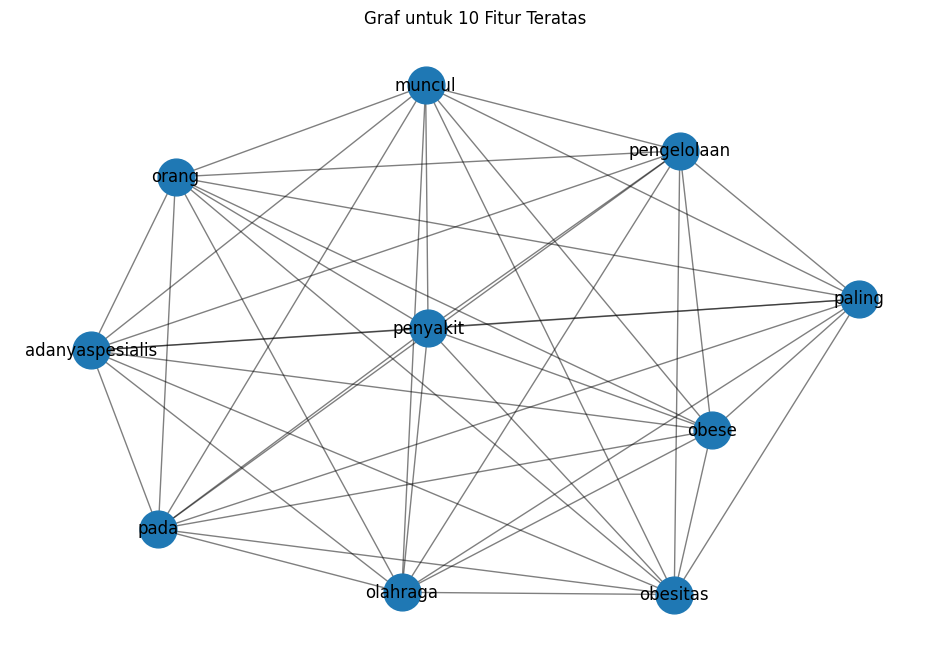

In [114]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():  # Memeriksa apakah dataframe df_tfidf_1berita sudah ada
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):  # Pastikan dataframe ini ada dan ukurannya benar
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [115]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

              Node  Degree Centrality  Closeness Centrality  \
0  adanyaspesialis                1.0                   1.0   
1      pengelolaan                1.0                   1.0   
2            obese                1.0                   1.0   
3         obesitas                1.0                   1.0   
4         olahraga                1.0                   1.0   
5            orang                1.0                   1.0   
6             pada                1.0                   1.0   
7           paling                1.0                   1.0   
8         penyakit                1.0                   1.0   
9           muncul                1.0                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0 

In [116]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: adanyaspesialis
